In [145]:
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.interpolate import RegularGridInterpolator
from matplotlib.colors import ListedColormap
import seaborn as sns
import os
import sys

In [215]:
def get_min_noisy(alpha, r, c, l, q):
    min1 = min([(1, 'Bias_Capacity'), (1, 'Bias_Source'), (l / alpha, 'Ridge_Capacity'), (l * r / alpha, 'Ridge_Source')])
    min2 = min([(1, 'VarF'), (l / alpha, 'VarF_Ridge')])
    min3 = min([(1/2, 'Bias_Width_Capacity'), (r, 'Bias_Width_Source')])
    min4 = min([(1, 'Vare'), (l / alpha, 'Vare_Ridge'), (q, 'Vare_Width')])
    term1 = (2 * alpha * min1[0], min1[1])
    term2 = ((alpha - c) * min2[0] + q * c, min2[1])
    term3 = (2*alpha*q* min3[0], min3[1])
    term4 = (1 - min4[0], min4[1])
    return min([term1, term2, term3, term4])

def get_min_noiseless(alpha, r, c, l, q):
    min1 = min([(1, 'Bias_Capacity'), (r, 'Bias_Source'), (l / alpha, 'Ridge_Capacity'), (l * r / alpha, 'Ridge_Source')])
    min2 = min([(1, 'VarF'), (l / alpha, 'VarF_Ridge')])
    min3 = min([(1/2, 'Bias_Width_Capacity'), (r, 'Bias_Width_Source')])
    term1 = (2 * alpha * min1[0], min1[1])
    term2 = ((alpha - c) * min2[0] + q * c, min2[1])
    term3 = (2*alpha*q* min3[0], min3[1])
    return min([term1, term2, term3])


id_dict = {'Bias_Source': 0, 'Bias_Capacity': 1, 'Ridge_Source': 2,  'Ridge_Capacity': 3,
           'Bias_Width_Source': 4, 'Bias_Width_Capacity': 5,
           'VarF': 6, 'VarF_Ridge': 7,
            'Vare_Ridge': 8, 'Vare_Width': 9, 'Vare': 10}

color_dict = {'Bias_Source': 'forestgreen', 'Bias_Capacity': 'orange', 'Ridge_Source' : 'yellowgreen', 'Ridge_Capacity': 'gold',
              'Bias_Width_Source': 'lightgreen', 'Bias_Width_Capacity': 'moccasin',
              'VarF': 'darkviolet', 'VarF_Ridge': 'rebeccapurple',
               'Vare_Ridge': 'darkred', 'Vare_Width': 'lightcoral', 'Vare': 'coral'}

label_dict = {'Bias_Source': 'Signal, Source', 'Bias_Capacity': 'Signal, Capacity', 'Ridge_Source': 'Ridge, Source',  'Ridge_Capacity': 'Ridge, Capacity',
              'Bias_Width_Source': 'Signal, Source, Width', 'Bias_Width_Capacity': 'Signal, Capacity, Width',
              'VarF': 'Var$_F$', 'VarF_Ridge': 'Var$_F$, Ridge',
              'Vare_Ridge': 'Noise Mitigated by $\\lambda$', 'Vare_Width': 'Noise Mitigated by $N$', 'Vare': 'Noise'}

rate_dict = {'Bias_Source': '$2 \\alpha r$', 'Bias_Capacity': '$2 \\alpha$', 'Ridge_Source': '$2 l r$',  'Ridge_Capacity': '$2 l$',
             'Bias_Width_Source': '$2 \\alpha r q$', 'Bias_Width_Capacity': '$\\alpha q$',
              'VarF': '$\\alpha - c + q c$', 'VarF_Ridge': '$l - c l / \\alpha + q c$',
              'Vare_Ridge': '$1 - l/\\alpha$', 'Vare_Width': '1 - q', 'Vare': '0'}


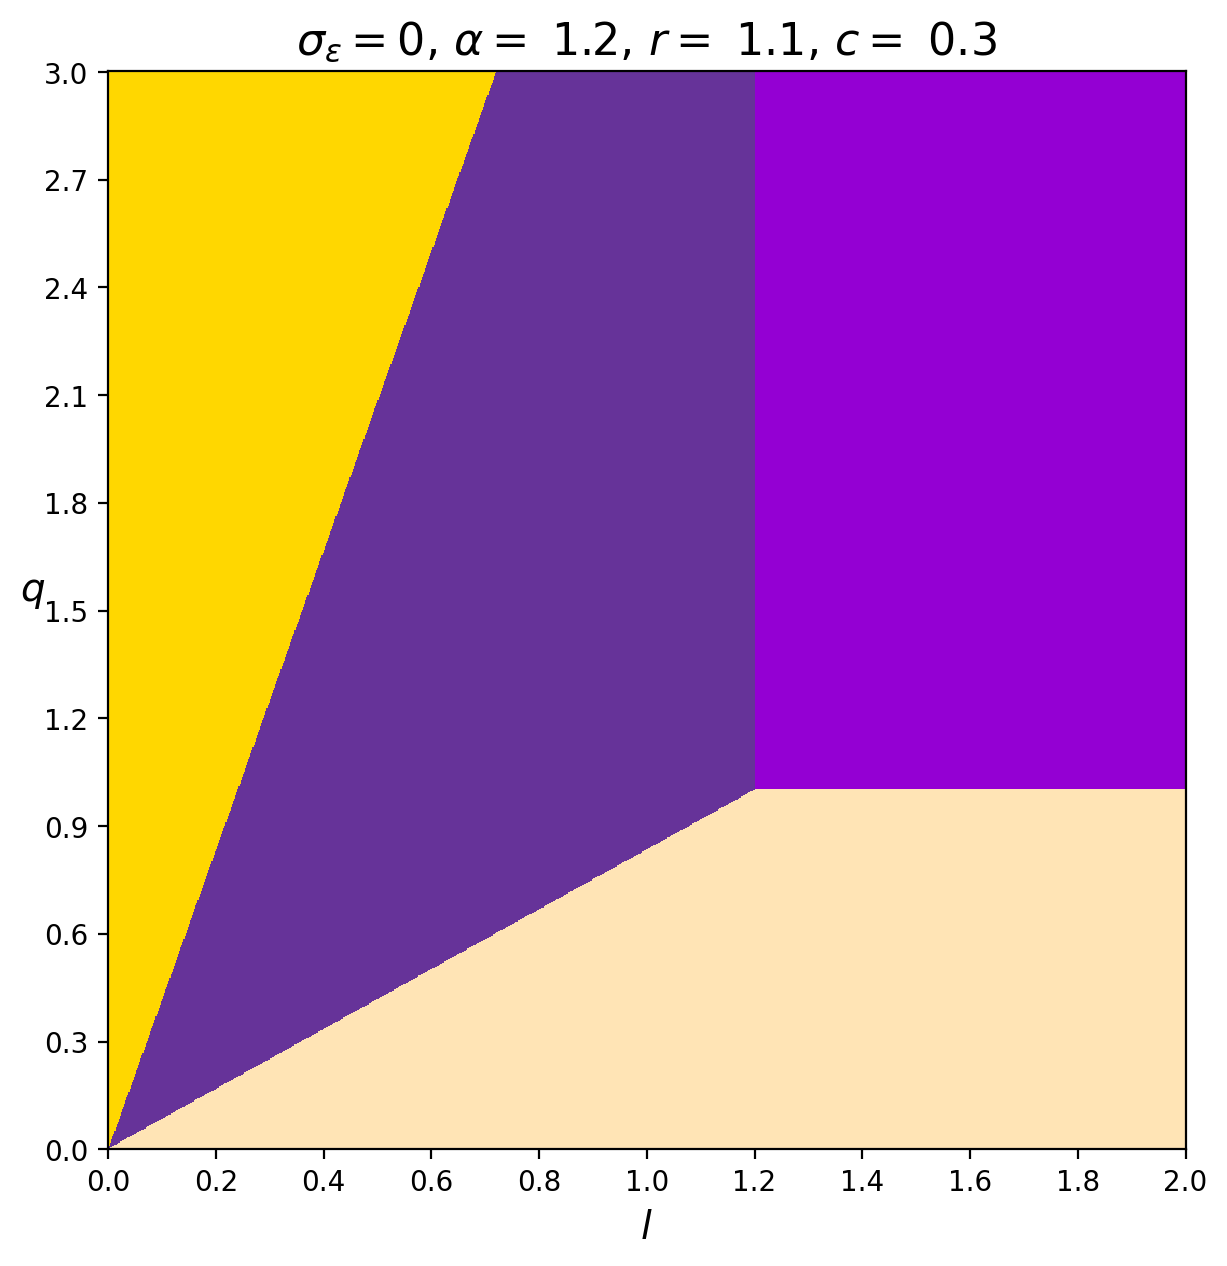

In [218]:
alpha = 1.2
r = 1.1
c = 0.3
noise = False
sweep_fn = get_min_noiseless if not noise else get_min_noisy

res = 1000
qmax, lmax = 3, 2
qs, ls = np.linspace(0, 3, res), np.linspace(0, 2, res)
qs, ls = np.meshgrid(qs, ls)
ids = [id_dict[sweep_fn(alpha, r, c, l, q)[1]] for l, q in zip(ls.flatten(), qs.flatten())]

plt.figure(figsize=(7, 7))
plt.imshow(np.array(ids).reshape(res, res).T[::-1,::] , cmap=ListedColormap(list(color_dict.values())), interpolation='nearest')

plt.clim(-0.5, -0.5+len(color_dict))
plt.xticks(np.linspace(0, res, 11), [f"{x:.1f}" for x in np.linspace(0, lmax, 11)])
plt.yticks(np.linspace(0, res, 11), [f"{x:.1f}" for x in np.linspace(0, qmax, 11)[::-1]])
plt.xlabel('$l$', fontsize=14)
plt.ylabel('$q$', fontsize=14, rotation='horizontal')
plt_title = '$\\sigma_{{\\epsilon}} \\neq 0$' if noise else '$\\sigma_{{\\epsilon}} = 0$'
plt.title(f"{plt_title}, $\\alpha = $ {alpha:.1f}, $r = $ {r:.1f}, $c = $ {c:.1f}", fontsize=16)

save_title = 'phase_plot_noisy' if noise else 'phase_plot_noiseless'
plt.savefig(f'{save_title}_alpha={alpha:.1f}_r={r:.1f}_c={c:.1f}.pdf', bbox_inches='tight')

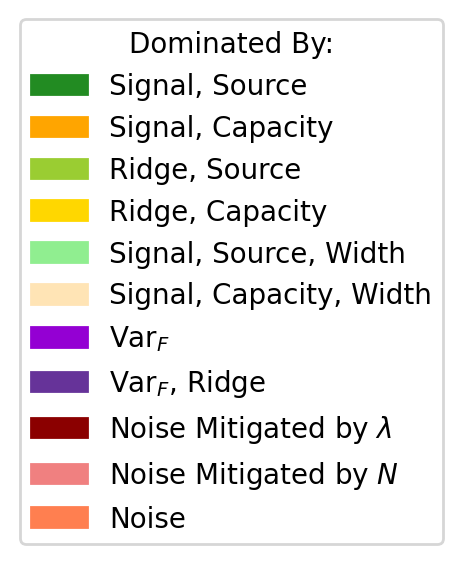

In [217]:
fig, ax = plt.subplots()
ax.axis('off')
legend_handles = [mpatches.Patch(color=color, label=label_dict[id]) for id, color in color_dict.items()]
legend = plt.legend(handles=legend_handles, title="Dominated By:", loc='center')
fig.canvas.draw()  # Draw the figure to get the legend size
bbox = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.set_size_inches(bbox.width, bbox.height)
plt.savefig('phase_plot_legend.pdf', bbox_inches='tight')

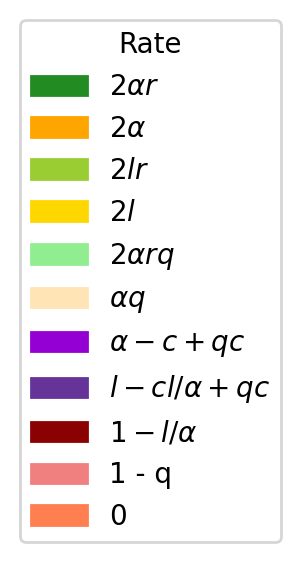

In [216]:
fig, ax = plt.subplots()
ax.axis('off')
legend_handles = [mpatches.Patch(color=color, label=rate_dict[id]) for id, color in color_dict.items()]
legend = plt.legend(handles=legend_handles, title="Rate", loc='center')
fig.canvas.draw()  # Draw the figure to get the legend size
bbox = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.set_size_inches(bbox.width, bbox.height)
plt.savefig('phase_plot_rate_legend.pdf', bbox_inches='tight')